#### 20/20. 

## DATA3OO - Homework 4
## Fall 2023 - Professor Kennedy Odongo
## Tai Nguyen


In [23]:
import pandas as pd # v 1.5.3
import numpy as np # v 1.21.5
import pmdarima as pm # v 1.8.5
import statsmodels.api as sm # v 0.13.5
import matplotlib.pyplot as plt # 3.6.3
import pandas_profiling as pp # v 3.6.3
import warnings as ww
import statsmodels.tsa.stattools as stattools  # v 0.13.5
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

%matplotlib inline

## EDA

In [24]:
# read in the dataset
finance = pd.read_csv("/Users/tainguyen103/Downloads/loan_default_data_set.csv")

#show first 10 rows of dataset
finance.head(10) 

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,num_card_12_month,num_auto_ 36_month,uti_open_card,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,rep_education,Def_ind
0,102956.11010,14819.057400,238,104,264,0,0,0,0.0,0,...,1,0,0.366737,0.342183,0.513934,0.550866,0,118266.32130,college,0
1,132758.72580,18951.934550,384,197,371,0,0,0,0.0,0,...,0,0,0.490809,0.540671,0.418016,NaN,0,89365.05765,college,0
2,124658.91740,15347.929690,277,110,288,0,0,0,0.0,0,...,0,0,0.359074,0.338560,0.341627,0.451417,0,201365.12130,college,0
3,133968.53690,14050.713340,375,224,343,0,0,0,0.0,2,...,1,0,0.700379,0.683589,0.542940,0.607843,0,191794.48550,college,0
4,143601.80170,14858.515270,374,155,278,0,0,0,0.0,0,...,0,0,0.647351,0.510812,0.632934,0.573680,0,161465.36790,graduate,0
5,83980.68793,8505.409715,250,178,255,1,0,0,0.0,0,...,0,0,0.602083,0.493298,0.697254,NaN,0,145392.18040,college,0
6,154508.47250,19626.364710,249,132,251,0,0,0,0.0,0,...,0,0,0.363827,0.515488,0.377024,0.444946,0,138870.57730,graduate,0
7,121591.04560,11143.193820,252,139,269,0,0,0,0.0,0,...,0,0,0.603348,0.685678,0.518624,0.650996,1,172338.97480,college,0
8,116267.28210,11572.646240,263,102,269,0,0,0,0.0,0,...,0,1,0.488049,0.399162,0.468299,NaN,0,156537.99710,college,0
9,144968.72430,18370.617010,328,169,328,0,0,0,0.0,0,...,0,0,0.519259,0.401434,0.532156,0.593617,1,171661.30630,high_school,0


In [25]:
#show last 10 rows of dataset
finance.tail(10) 

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,num_card_12_month,num_auto_ 36_month,uti_open_card,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,rep_education,Def_ind
19990,109331.52110,14733.488490,279,147,278,0,0,0,0.000000,1,...,0,2,0.536290,0.450051,0.646805,0.547561,0,NaN,college,0
19991,139018.80920,16279.404630,223,113,223,0,0,0,0.000000,0,...,0,0,0.424803,0.434816,0.636746,0.520201,0,154807.90300,college,0
19992,118021.00220,17165.158580,330,172,328,0,0,0,0.000000,0,...,0,0,0.424491,0.499234,0.436534,0.483930,1,NaN,college,0
19993,123398.85340,12685.051170,410,219,411,0,0,0,0.000000,0,...,0,0,0.598732,0.341668,0.625128,0.601800,1,159783.36620,college,0
19994,99102.92799,11033.901590,222,119,259,0,0,0,0.000000,0,...,0,0,0.591720,0.681487,0.631201,0.660454,0,167343.82270,graduate,1
19995,89665.13930,11521.159950,319,139,363,0,0,0,0.000000,0,...,0,0,0.535628,0.634712,0.527230,0.602345,0,NaN,high_school,0
19996,136211.63530,17977.054130,297,137,273,0,0,0,0.000000,2,...,0,0,0.464774,0.450030,0.545108,NaN,1,NaN,high_school,0
19997,110721.87650,13316.820540,304,151,257,0,0,0,0.000000,0,...,0,0,0.264544,0.340289,0.412155,NaN,0,157706.15810,college,0
19998,96742.36371,11743.262370,275,141,294,2,1,1,3009.387661,0,...,0,0,0.609226,0.582007,0.301612,0.697052,1,97387.97414,college,1
19999,107338.82070,7942.952546,325,195,302,0,0,0,0.000000,0,...,0,0,0.358067,0.435511,0.349246,NaN,0,165447.16380,college,0


In [26]:
#stats summary
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tot_balance                      20000 non-null  float64
 1   avg_bal_cards                    20000 non-null  float64
 2   credit_age                       20000 non-null  int64  
 3   credit_age_good_account          20000 non-null  int64  
 4   credit_card_age                  20000 non-null  int64  
 5   num_acc_30d_past_due_12_months   20000 non-null  int64  
 6   num_acc_30d_past_due_6_months    20000 non-null  int64  
 7   num_mortgage_currently_past_due  20000 non-null  int64  
 8   tot_amount_currently_past_due    20000 non-null  float64
 9   num_inq_12_month                 20000 non-null  int64  
 10  num_card_inq_24_month            20000 non-null  int64  
 11  num_card_12_month                20000 non-null  int64  
 12  num_auto_ 36_month

In [27]:
#find missing values in the dataset
finance.isna().sum()

tot_balance                           0
avg_bal_cards                         0
credit_age                            0
credit_age_good_account               0
credit_card_age                       0
num_acc_30d_past_due_12_months        0
num_acc_30d_past_due_6_months         0
num_mortgage_currently_past_due       0
tot_amount_currently_past_due         0
num_inq_12_month                      0
num_card_inq_24_month                 0
num_card_12_month                     0
num_auto_ 36_month                    0
uti_open_card                         0
pct_over_50_uti                       0
uti_max_credit_line                   0
pct_card_over_50_uti               1958
ind_XYZ                               0
rep_income                         1559
rep_education                         1
Def_ind                               0
dtype: int64

### It seems that we have missing values in three columns : pct_card_over_50_uti, rep_income, rep_education. Although it may not be the best option, we can resolve this by replacing the missing values by the mean value. For the rep_education variable, we'll perform two tasks: make dummy varibles to convert datatypes from object to numeric & remove the single missing value from the dataset since this will not significantly affect our data. 

In [28]:
#create dummy variables for rep_education
rep_education_dummies = pd.get_dummies(finance['rep_education'])
finance = pd.concat([finance, rep_education_dummies], axis=1)  

#remove mising value for rep_education
finance.dropna(subset=['rep_education'], inplace=True)
finance

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,rep_education,Def_ind,college,graduate,high_school,other
0,102956.11010,14819.057400,238,104,264,0,0,0,0.000000,0,...,0.513934,0.550866,0,118266.32130,college,0,1,0,0,0
1,132758.72580,18951.934550,384,197,371,0,0,0,0.000000,0,...,0.418016,NaN,0,89365.05765,college,0,1,0,0,0
2,124658.91740,15347.929690,277,110,288,0,0,0,0.000000,0,...,0.341627,0.451417,0,201365.12130,college,0,1,0,0,0
3,133968.53690,14050.713340,375,224,343,0,0,0,0.000000,2,...,0.542940,0.607843,0,191794.48550,college,0,1,0,0,0
4,143601.80170,14858.515270,374,155,278,0,0,0,0.000000,0,...,0.632934,0.573680,0,161465.36790,graduate,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,89665.13930,11521.159950,319,139,363,0,0,0,0.000000,0,...,0.527230,0.602345,0,NaN,high_school,0,0,0,1,0
19996,136211.63530,17977.054130,297,137,273,0,0,0,0.000000,2,...,0.545108,NaN,1,NaN,high_school,0,0,0,1,0
19997,110721.87650,13316.820540,304,151,257,0,0,0,0.000000,0,...,0.412155,NaN,0,157706.15810,college,0,1,0,0,0
19998,96742.36371,11743.262370,275,141,294,2,1,1,3009.387661,0,...,0.301612,0.697052,1,97387.97414,college,1,1,0,0,0


In [29]:
##find out which column has missing values, and replace with the mean
finance['pct_card_over_50_uti'].fillna(finance['pct_card_over_50_uti'].mean(), inplace=True)
finance['rep_income'].fillna(finance['rep_income'].mean(), inplace=True)

In [30]:
#check again. Data is now clear of missing values
finance.isna().sum()

tot_balance                        0
avg_bal_cards                      0
credit_age                         0
credit_age_good_account            0
credit_card_age                    0
num_acc_30d_past_due_12_months     0
num_acc_30d_past_due_6_months      0
num_mortgage_currently_past_due    0
tot_amount_currently_past_due      0
num_inq_12_month                   0
num_card_inq_24_month              0
num_card_12_month                  0
num_auto_ 36_month                 0
uti_open_card                      0
pct_over_50_uti                    0
uti_max_credit_line                0
pct_card_over_50_uti               0
ind_XYZ                            0
rep_income                         0
rep_education                      0
Def_ind                            0
college                            0
graduate                           0
high_school                        0
other                              0
dtype: int64

In [31]:
#are the classes balanced?
finance["Def_ind"].value_counts()

0    17999
1     2000
Name: Def_ind, dtype: int64

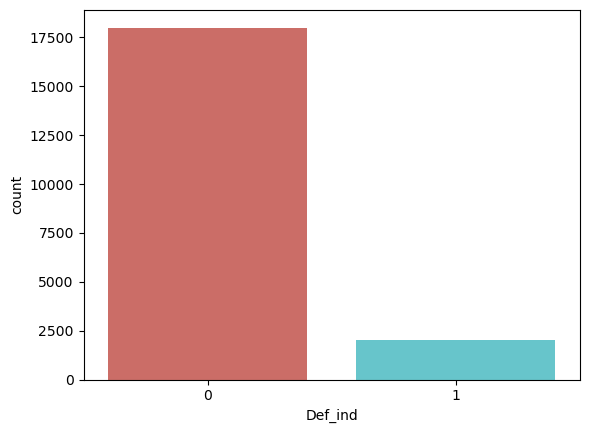

In [32]:
sns.countplot(x="Def_ind", data=finance, palette="hls")
plt.show()

### The ratio is roughly 9:1 for the two classes, which indicates that the classes are imbalanced in this dataset.

## 1. Creating samples

In [33]:
#Oversampling
y = finance["Def_ind"]
X = finance.drop(columns=["Def_ind", "rep_education"])  # drop rep_education since it is a string/object type
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=0)

# Instantiate the RandomUnderSampler object
oversampler = RandomOverSampler(sampling_strategy={0: 18000, 1:18000}, random_state=42)
X_over, y_over = oversampler.fit_resample(X, y)
print(y_over.value_counts())

0    18000
1    18000
Name: Def_ind, dtype: int64


/Users/tainguyen103/anaconda3/lib/python3.11/site-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (18000) in class 0 will be larger than the number of samples in the majority class (class #0 -> 17999)
  warnings.warn(
/Users/tainguyen103/anaconda3/lib/python3.11/site-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (18000) in class 1 will be larger than the number of samples in the majority class (class #0 -> 17999)
  warnings.warn(


In [34]:
# Undersampling
# Instantiate the RandomUnderSampler object
undersampler = RandomUnderSampler(sampling_strategy={0: 2000, 1: 2000}, random_state=42)

# Fit and transform the data
X_under, y_under = undersampler.fit_resample(X, y)
print(y_under.value_counts())

0    2000
1    2000
Name: Def_ind, dtype: int64


In [35]:
# Using SMOTE
# Instantiate the SMOTE object with the desired sampling strategy
smt = SMOTE(random_state = 42)
X_train_res, y_train_res = smt.fit_resample(X_train, y_train)

print(y_train_res.value_counts())

0    14415
1    14415
Name: Def_ind, dtype: int64


#### Very nicely done on the sampling Tai. Good job. 

## 2. Fitting Logistic Regression and LDA models 

### First Model: Oversampling

In [36]:
# Logistic Regression

# Create an instance of the logistic regression
firstModel = LogisticRegression()

# Fit the classifier to the training data
firstModel.fit(X_over, y_over)

LogisticRegression()

In [47]:
# Linear Discriminant Analysis

# Create an instance of the logistic regression
firstModel_LDA = LinearDiscriminantAnalysis()

# Fit the classifier to the training data
firstModel_LDA.fit(X_over, y_over)

LinearDiscriminantAnalysis()

### Second Model: Undersampling

In [40]:
# Logistic Regression

# Create an instance of the logistic regression
secondModel = LogisticRegression()

# Fit the classifier to the training data
secondModel.fit(X_under, y_under)

LogisticRegression()

In [48]:
# Linear Discriminant Analysis

# Create an instance of the logistic regression
secondModel_LDA = LinearDiscriminantAnalysis()

# Fit the classifier to the training data
secondModel_LDA.fit(X_under, y_under)

LinearDiscriminantAnalysis()

### Third Model: Oversampling with SMOTE

In [44]:
# Logistic Regression

# Create an instance of the logistic regression
thirdModel = LogisticRegression()

# Fit the classifier to the training data
thirdModel.fit(X_train_res, y_train_res)

LogisticRegression()

In [49]:
# Linear Discriminant Analysis

# Create an instance of the logistic regression
thirdModel_LDA = LinearDiscriminantAnalysis()

# Fit the classifier to the training data
thirdModel_LDA.fit(X_train_res, y_train_res)

LinearDiscriminantAnalysis()

## 3.Report findings on model accuracy, recall and precision.

### First Model: Oversampling

In [41]:
#Logistic Regression

y_pred = firstModel.predict(X_test)

# Calculate accuracy, recall, and precision
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Report the findings
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("Precision: {:.2f}%".format(precision * 100))

Accuracy: 74.72%
Recall: 51.44%
Precision: 20.92%


In [50]:
# Linear Discriminant Analysis

y_pred = firstModel_LDA.predict(X_test)

# Calculate accuracy, recall, and precision
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Report the findings
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("Precision: {:.2f}%".format(precision * 100))

Accuracy: 75.08%
Recall: 67.55%
Precision: 24.58%


* Accuracy level of roughly 75% on average for both models respectively indicates that the models have a reasonably good performance. 

* Precision is the ratio of correct positive predictions out of all positive predictions made that ranges between 0.0 for no precision and 1.0 for full or perfect precision. We can see that the precision results are 0.21 and 0.25 respectively for the two models, which indicate a fairly good but below average value.

* Recall value provides an indication of missed positive predictions. In this way, recall provides some notion of the coverage of the positive class. The result is a value between 0.0 for no recall and 1.0 for full or perfect recall.  We see that recall values are 0.51 and 0.68 for the two models respectively, indicating that they predict 51% and 68% samples correctly in this case. 

### Second Model: Undersampling

In [42]:
# Logistic Regression

y_pred = secondModel.predict(X_test)

# Calculate accuracy, recall, and precision
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Report the findings
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("Precision: {:.2f}%".format(precision * 100))

Accuracy: 74.88%
Recall: 50.24%
Precision: 20.75%


In [51]:
# Linear Discriminant Analysis

y_pred = secondModel_LDA.predict(X_test)

# Calculate accuracy, recall, and precision
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Report the findings
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("Precision: {:.2f}%".format(precision * 100))

Accuracy: 74.42%
Recall: 67.79%
Precision: 24.08%


* Accuracy level of roughly 75% on average for the both models indicates that the models have a reasonably good performance. 

* Precision is the ratio of correct positive predictions out of all positive predictions made that ranges between 0.0 for no precision and 1.0 for full or perfect precision. We can see that the precision results are 0.21 and 0.24 respectively for the two models, which indicate a fairly good but below average value.

* Recall value provides an indication of missed positive predictions. In this way, recall provides some notion of the coverage of the positive class. The result is a value between 0.0 for no recall and 1.0 for full or perfect recall.  We see that recall values are roughly 0.50 and 0.68 for the two models respectively, indicating that they predict 50% and 68% samples correctly in this case. 

### Third Model: Oversampling with SMOTE

In [45]:
# Logistic Regression

y_pred = thirdModel.predict(X_test)

# Calculate accuracy, recall, and precision
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Report the findings
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("Precision: {:.2f}%".format(precision * 100))

Accuracy: 72.85%
Recall: 51.44%
Precision: 19.49%


In [52]:
# Linear Discriminant Analysis

y_pred = thirdModel_LDA.predict(X_test)

# Calculate accuracy, recall, and precision
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Report the findings
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("Precision: {:.2f}%".format(precision * 100))

Accuracy: 85.00%
Recall: 32.69%
Precision: 29.82%


* Accuracy level of roughly 73% and 85% for the two models respectively indicates that the models have a reasonably good performance. 

* Precision is the ratio of correct positive predictions out of all positive predictions made that ranges between 0.0 for no precision and 1.0 for full or perfect precision. We can see that the precision results are 0.19 and 0.30 respectively for the two models, which indicate a fairly good but below average value.

* Recall value provides an indication of missed positive predictions. In this way, recall provides some notion of the coverage of the positive class. The result is a value between 0.0 for no recall and 1.0 for full or perfect recall.  We see that recall values are 0.51 and 0.33 for the two models respectively, indicating that they predict 51% and 33% samples correctly in this case. 

## 4. Plot an AUC_ROC curve and choose the best model based on the curve.

### First Model: Oversampling

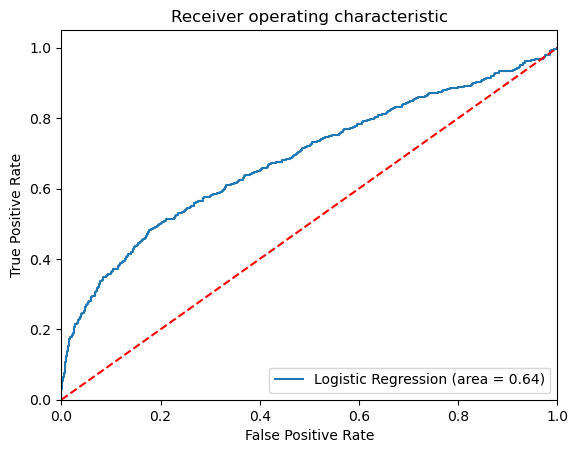

In [53]:
logit_roc_auc = roc_auc_score(y_test, firstModel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, firstModel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Second Model: Undersampling

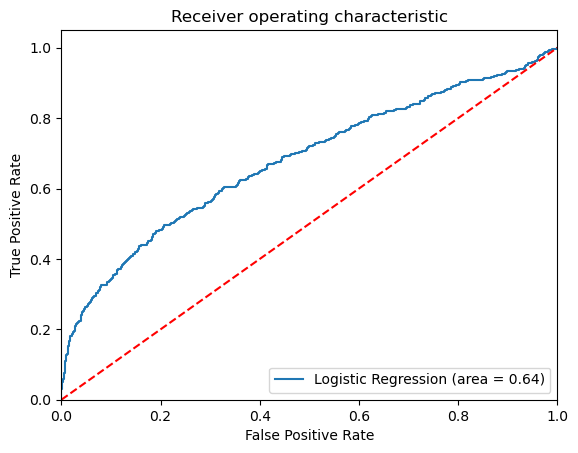

In [54]:
logit_roc_auc = roc_auc_score(y_test, secondModel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, secondModel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Third Model: Oversampling with SMOTE

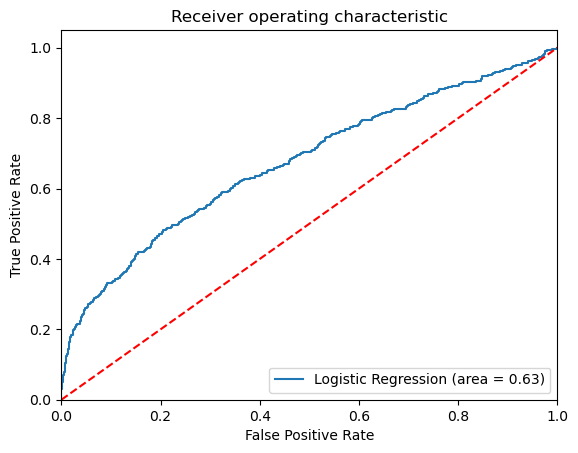

In [55]:
logit_roc_auc = roc_auc_score(y_test, thirdModel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, thirdModel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## 5. Choose a model

Preferred model would be the Third one - oversampling using SMOTE considering relatively higher accuracy and precision levels compared to the other two models. 

#### Good job Tai. 